# Plot data exported from dataRetrieval

In [28]:
%matplotlib inline
# %matplotlib notebook

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# fig_dir = "~/Dropbox/Conferences_and_Meetings/PI meetings/PI meeting 2020/figures/"

fig_dir = "/Users/shua784/Dropbox/PNNL/Projects/Coastal/figures/"
data_dir =  "/Users/shua784/Dropbox/PNNL/Projects/Coastal/data/"

fname_data = data_dir + "Maumee_EOF_site_qw.csv"

In [2]:
# data = pd.read_csv("~/Dropbox/Conferences_and_Meetings/PI meetings/PI meeting 2020/data/USGS_12510500_NO3.csv")

## plot NWIS water quality data

In [71]:
df = pd.read_csv(fname_data)

In [72]:
df

,Unnamed: 0,agency_cd,site_no,sample_dt,sample_tm,sample_end_dt,sample_end_tm,sample_start_time_datum_cd,tm_datum_rlbty_cd,coll_ent_cd,...,dqi_cd_00681,rpt_lev_va_00681,rpt_lev_cd_00681,lab_std_va_00681,prep_set_no_00681,prep_dt_00681,anl_set_no_00681,anl_dt_00681,result_lab_cm_tx_00681,anl_ent_cd_00681
0,1,USGS,4188496,8/14/12,20:45,NaN,NaN,EDT,K,USGS-WRD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,USGS,4188496,8/14/12,23:45,NaN,NaN,EDT,K,USGS-WRD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,USGS,4188496,8/15/12,11:30,NaN,NaN,EDT,K,USGS-WRD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,USGS,4188496,9/2/12,2:35,NaN,NaN,EDT,K,USGS-WRD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,USGS,4188496,9/2/12,4:25,NaN,NaN,EDT,K,USGS-WRD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,10532,USGS,411229084541102,3/19/20,16:12,NaN,4:07,EST,K,USGS-WRD,...,S,NaN,NaN,NaN,NaN,4/14/20,NaN,4/14/20,NaN,WI-UWE
3322,10536,USGS,411229084541102,3/22/20,12:17,NaN,NaN,EST,K,USGS-WRD,...,S,NaN,NaN,NaN,NaN,4/14/20,NaN,4/14/20,NaN,WI-UWE
3323,10540,USGS,411229084541102,4/18/20,13:57,NaN,NaN,EST,K,USGS-WRD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3324,10543,USGS,411229084541102,5/5/20,8:39,NaN,NaN,EST,K,USGS-WRD,...,S,NaN,NaN,NaN,NaN,5/26/20,NaN,5/29/20,NaN,WI-UWE


In [73]:
df.columns

Index(['Unnamed: 0', 'agency_cd', 'site_no', 'sample_dt', 'sample_tm',
       'sample_end_dt', 'sample_end_tm', 'sample_start_time_datum_cd',
       'tm_datum_rlbty_cd', 'coll_ent_cd', 'medium_cd', 'project_cd',
       'aqfr_cd', 'tu_id', 'body_part_id', 'hyd_cond_cd', 'samp_type_cd',
       'hyd_event_cd', 'sample_lab_cm_tx', 'startDateTime', 'remark_cd_00600',
       'result_va_00600', 'val_qual_tx_00600', 'meth_cd_00600', 'dqi_cd_00600',
       'rpt_lev_va_00600', 'rpt_lev_cd_00600', 'lab_std_va_00600',
       'prep_set_no_00600', 'prep_dt_00600', 'anl_set_no_00600',
       'anl_dt_00600', 'result_lab_cm_tx_00600', 'anl_ent_cd_00600',
       'remark_cd_00660', 'result_va_00660', 'val_qual_tx_00660',
       'meth_cd_00660', 'dqi_cd_00660', 'rpt_lev_va_00660', 'rpt_lev_cd_00660',
       'lab_std_va_00660', 'prep_set_no_00660', 'prep_dt_00660',
       'anl_set_no_00660', 'anl_dt_00660', 'result_lab_cm_tx_00660',
       'anl_ent_cd_00660', 'remark_cd_80154', 'result_va_80154',
       'v

In [74]:
df.rename(columns={"result_va_00600":"Total N (mg/L)", "result_va_00660":"Phosphate (mg/L)", 
                   "result_va_80154":"Suspended sediment (mg/L)", "result_va_00681":"DOC (mg/L)"}, 
         inplace = True)

In [75]:
df['startDateTime'] = pd.to_datetime(df['startDateTime'])

df.set_index('startDateTime', inplace = True, drop = False)

In [76]:
stations = np.unique(df.site_no)

In [141]:
stations

array([        4183038,         4188496, 405051083391001, 405051083391201,
       411228084541701, 411228084541702, 411229084541101, 411229084541102])

In [136]:
# istation = 405051083391001
icol = 'Concentration (mg/L)'
ivar = 'Nutrient'
# col_list = ['startDateTime', "Total N (mg/L)", "Phosphate (mg/L)", "Suspended sediment (mg/L)","DOC (mg/L)"]
col_list = ['startDateTime', "Total N (mg/L)", "Phosphate (mg/L)", "DOC (mg/L)"]

In [169]:
def plot_single_station(df, station_id):
    idf = df[df['site_no'] == istation][col_list]
    idf_m = idf.melt('startDateTime', var_name=ivar, value_name =icol)
    g = sns.FacetGrid(idf_m, row= ivar,  height=2, aspect=3, sharey = False)
    g.map(sns.lineplot, "startDateTime", icol, marker = "o", sizes = [1])
    # g.add_legend()
    
    
    if len(g.axes) == 3:
        g.axes[0,0].get_lines()[0].set_color('maroon')
        g.axes[1,0].get_lines()[0].set_color('darkcyan')
        g.axes[2,0].get_lines()[0].set_color('darkslateblue')
    elif len(g.axes) == 2:
        g.axes[0,0].get_lines()[0].set_color('maroon')
        g.axes[1,0].get_lines()[0].set_color('darkcyan')
    else:
        raise RuntimeError
        
    g.set(ylim = (0, None))
    g.set(xlim = (df['startDateTime'].min(), df['startDateTime'].max()))
    g.set(xlabel = '')
    # g.set(title = ' well')
    
    return g

**multiple plots**

In [161]:
for istation in stations[2:]:
    g = plot_single_station(df, istation)
    g.savefig(fig_dir + 'usgs'+str(istation)+'.png', dpi = 300)
    plt.close()

**single plot**

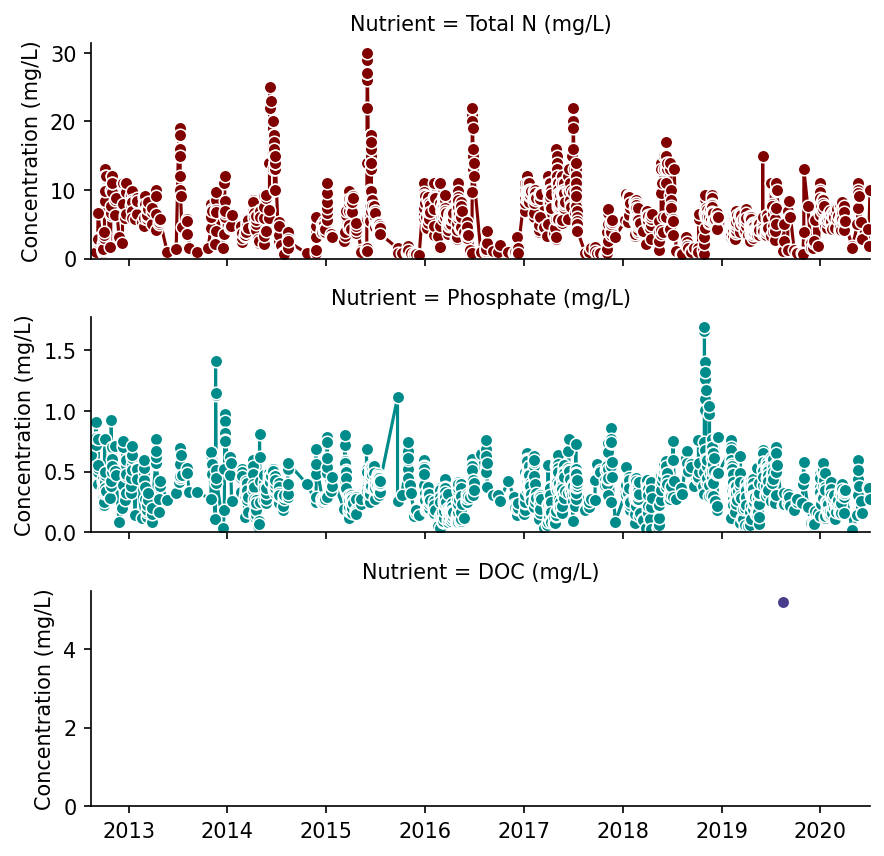

In [173]:
istation = 4188496
g = plot_single_station(df, istation)
g.savefig(fig_dir + 'usgs'+str(istation)+'.png', dpi = 300)

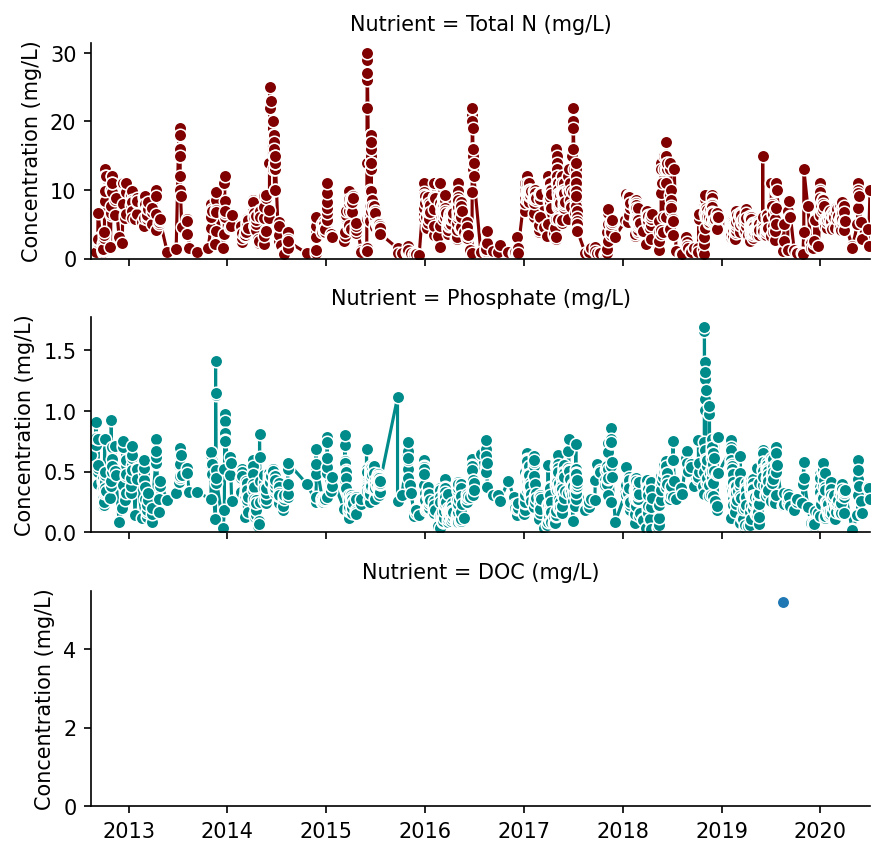

In [171]:
istation = 4188496

idf = df[df['site_no'] == istation][col_list]
idf_m = idf.melt('startDateTime', var_name=ivar, value_name =icol)
g = sns.FacetGrid(idf_m, row= ivar,  height=2, aspect=3, sharey = False)
g.map(sns.lineplot, "startDateTime", icol, marker = "o", sizes = [1])
g.axes[0,0].get_lines()[0].set_color('maroon')
g.axes[1,0].get_lines()[0].set_color('darkcyan')
g.set(ylim = (0, None))
g.set(xlim = (df['startDateTime'].min(), df['startDateTime'].max()))
g.set(xlabel = '')

g.savefig(fig_dir + 'usgs'+str(istation)+'.png', dpi = 300)

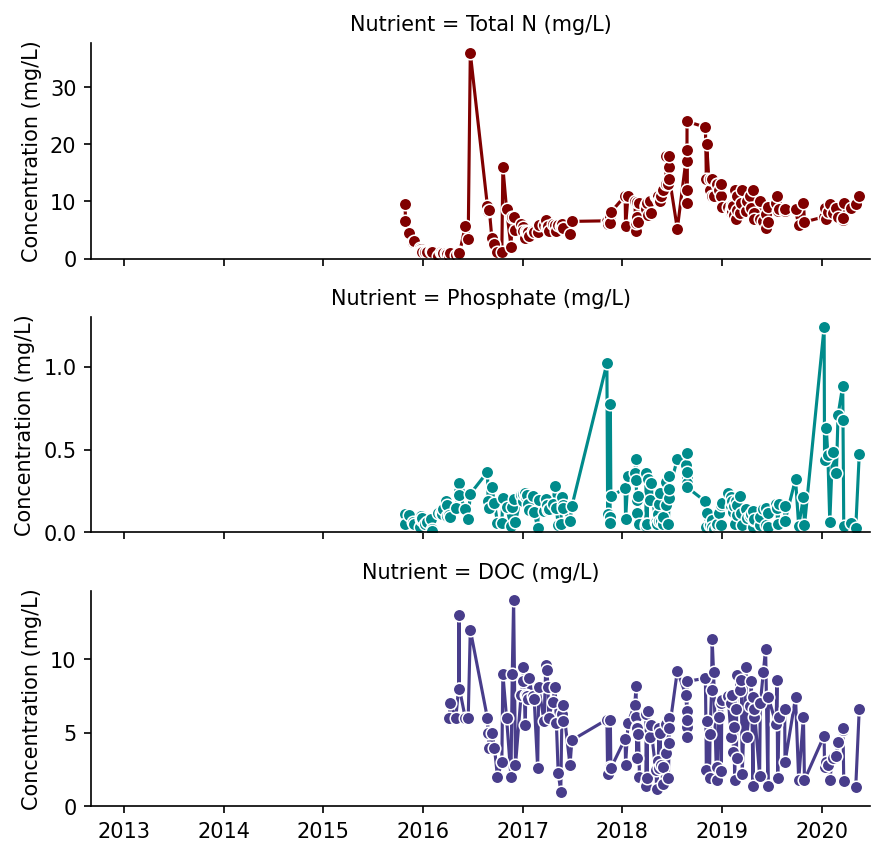

In [157]:
g = plot_single_station(df, 411228084541701)
# g.set(xlim = (idf['startDateTime'].min(), idf['startDateTime'].max()))

In [138]:
g.savefig(fig_dir + 'usgs'+str(istation)+'.png', dpi = 300)

In [ ]:
idf = df[df['site_no'] == istation][col_list]

In [ ]:
# fig, axes = plt.subplots(3,1, figsize = (6, 10))

# for i in np.arange(3):

#     sns.lineplot(x = idf.index, y = col_list[i+1],  marker = "o",
#              data = idf, ax = axes[i])
#     axes[i].set_xlabel('')


In [ ]:
# idf.plot(y = ["Total N (mg/L)", "Phosphate (mg/L)", "DOC (mg/L)"], subplots = True, 
#          layout = (3, 1), figsize = (8, 12))

In [107]:
idf_m = idf.melt('startDateTime', var_name=ivar, value_name =icol)

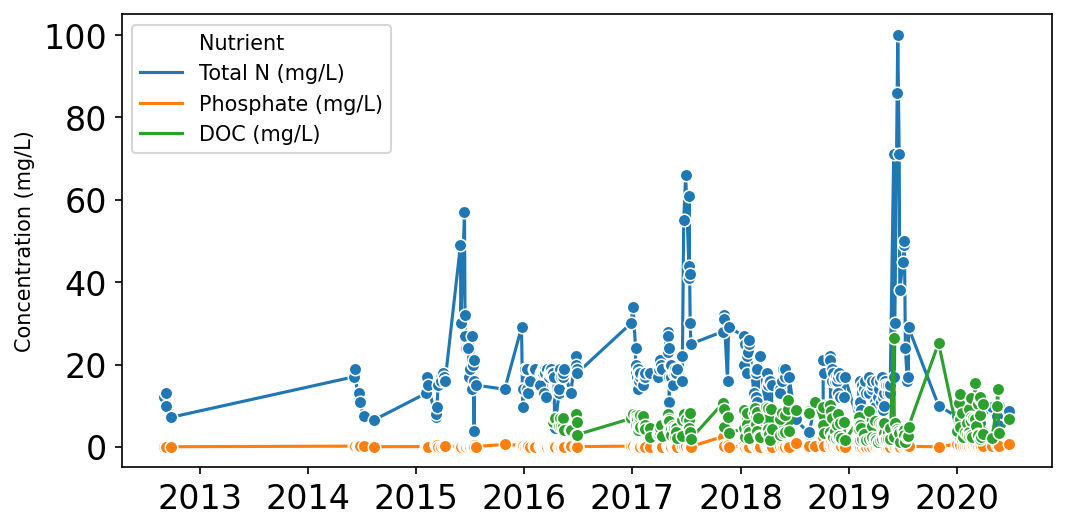

In [62]:
# fig, ax = plt.subplots(1,1, figsize = (8, 4))

# sns.lineplot(x = 'startDateTime', y = icol, hue = ivar, marker = "o",
#              data = idf)
# # ax.set_ylabel('Nitrate (mg/L)', fontsize = 18)
# ax.set_xlabel('')
# # ax.set_title('USGS-12510500 (Yakima River at Kiona, WA)', fontsize = 24)

# ax.tick_params(axis='both', which='major', labelsize=16)

## plot single station

In [32]:
data = pd.read_csv("./USGS-12505450_NO3.csv")

In [33]:
data

,Unnamed: 0,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime.Time,ActivityStartTime.TimeZoneCode,...,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure.MeasureValue,DetectionQuantitationLimitMeasure.MeasureUnitCode,PreparationStartDate,ProviderName,ActivityStartDateTime,ActivityEndDateTime
0,1,USGS-WA,USGS Washington Water Science Center,nwiswa.01.01000062,Quality Control Sample-Field Replicate,Water,Surface Water,2010-05-03,10:10:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2010-05-03 17:10:00,NaN
1,2,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00100330,Quality Control Sample-Field Replicate,Water,Surface Water,2001-08-10,11:10:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2001-08-10 18:10:00,NaN
2,3,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00300370,Sample-Routine,Water,Surface Water,2003-09-08,10:00:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2003-09-08 17:00:00,NaN
3,4,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00200154,Quality Control Sample-Field Replicate,Water,Surface Water,2002-06-19,13:40:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2002-06-19 20:40:00,NaN
4,5,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00200368,Sample-Routine,Water,Surface Water,2002-09-18,11:30:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2002-09-18 18:30:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,283,USGS-WA,USGS Washington Water Science Center,nwiswa.01.01800512,Sample-Routine,Water,Surface Water,2018-01-29,08:00:00,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2018-01-29 16:00:00,NaN
283,284,USGS-WA,USGS Washington Water Science Center,nwiswa.01.01800589,Sample-Routine,Water,Surface Water,2018-02-14,09:00:00,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2018-02-14 17:00:00,NaN
284,285,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00400139,Quality Control Sample-Field Replicate,Water,Surface Water,2004-03-22,10:20:00,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2004-03-22 18:20:00,NaN
285,286,USGS-WA,USGS Washington Water Science Center,nwiswa.01.01600922,Sample-Routine,Water,Surface Water,2016-02-24,08:20:00,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2016-02-24 16:20:00,NaN


In [14]:
data['startDateTime'] = pd.to_datetime(data['startDateTime'])

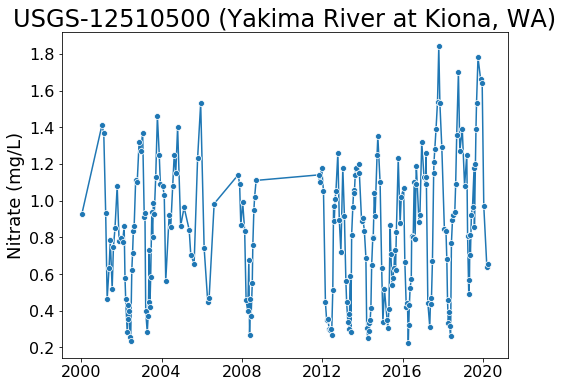

In [19]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))

sns.lineplot(x = "startDateTime", y = "result_va", marker = "o",
             data = data)
ax.set_ylabel('Nitrate (mg/L)', fontsize = 18)
ax.set_xlabel('')
ax.set_title('USGS-12510500 (Yakima River at Kiona, WA)', fontsize = 24)

ax.tick_params(axis='both', which='major', labelsize=16)

In [30]:
# fig.savefig(fig_dir + "USGS-12510500.png", dpi=300)
fig.savefig("./USGS-12510500.png", dpi=300)
plt.close(fig)

# from WQP station

In [34]:
data = pd.read_csv("./USGS-12505450_NO3.csv")

In [35]:
data

,Unnamed: 0,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime.Time,ActivityStartTime.TimeZoneCode,...,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure.MeasureValue,DetectionQuantitationLimitMeasure.MeasureUnitCode,PreparationStartDate,ProviderName,ActivityStartDateTime,ActivityEndDateTime
0,1,USGS-WA,USGS Washington Water Science Center,nwiswa.01.01000062,Quality Control Sample-Field Replicate,Water,Surface Water,2010-05-03,10:10:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2010-05-03 17:10:00,NaN
1,2,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00100330,Quality Control Sample-Field Replicate,Water,Surface Water,2001-08-10,11:10:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2001-08-10 18:10:00,NaN
2,3,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00300370,Sample-Routine,Water,Surface Water,2003-09-08,10:00:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2003-09-08 17:00:00,NaN
3,4,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00200154,Quality Control Sample-Field Replicate,Water,Surface Water,2002-06-19,13:40:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2002-06-19 20:40:00,NaN
4,5,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00200368,Sample-Routine,Water,Surface Water,2002-09-18,11:30:00,PDT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2002-09-18 18:30:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,283,USGS-WA,USGS Washington Water Science Center,nwiswa.01.01800512,Sample-Routine,Water,Surface Water,2018-01-29,08:00:00,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2018-01-29 16:00:00,NaN
283,284,USGS-WA,USGS Washington Water Science Center,nwiswa.01.01800589,Sample-Routine,Water,Surface Water,2018-02-14,09:00:00,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2018-02-14 17:00:00,NaN
284,285,USGS-WA,USGS Washington Water Science Center,nwiswa.01.00400139,Quality Control Sample-Field Replicate,Water,Surface Water,2004-03-22,10:20:00,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2004-03-22 18:20:00,NaN
285,286,USGS-WA,USGS Washington Water Science Center,nwiswa.01.01600922,Sample-Routine,Water,Surface Water,2016-02-24,08:20:00,PST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS,2016-02-24 16:20:00,NaN


In [37]:
data.columns

Index(['Unnamed: 0', 'OrganizationIdentifier', 'OrganizationFormalName',
       'ActivityIdentifier', 'ActivityTypeCode', 'ActivityMediaName',
       'ActivityMediaSubdivisionName', 'ActivityStartDate',
       'ActivityStartTime.Time', 'ActivityStartTime.TimeZoneCode',
       'ActivityEndDate', 'ActivityEndTime.Time',
       'ActivityEndTime.TimeZoneCode',
       'ActivityDepthHeightMeasure.MeasureValue',
       'ActivityDepthHeightMeasure.MeasureUnitCode',
       'ActivityDepthAltitudeReferencePointText',
       'ActivityTopDepthHeightMeasure.MeasureValue',
       'ActivityTopDepthHeightMeasure.MeasureUnitCode',
       'ActivityBottomDepthHeightMeasure.MeasureValue',
       'ActivityBottomDepthHeightMeasure.MeasureUnitCode', 'ProjectIdentifier',
       'ActivityConductingOrganizationText', 'MonitoringLocationIdentifier',
       'ActivityCommentText', 'SampleAquifer', 'HydrologicCondition',
       'HydrologicEvent', 'SampleCollectionMethod.MethodIdentifier',
       'SampleCollectionMet

In [36]:
data['ActivityStartDateTime'] = pd.to_datetime(data['ActivityStartDateTime'])

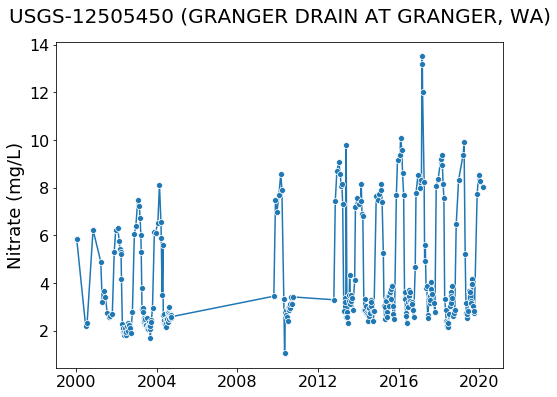

In [40]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))

sns.lineplot(x = "ActivityStartDateTime", y = "ResultMeasureValue", marker = "o",
             data = data)
ax.set_ylabel('Nitrate (mg/L)', fontsize = 18)
ax.set_xlabel('')
ax.set_title('USGS-12505450 (GRANGER DRAIN AT GRANGER, WA)', fontsize = 20, pad = 20)

ax.tick_params(axis='both', which='major', labelsize=16)

In [41]:
# fig.savefig(fig_dir + "USGS-12510500.png", dpi=300)
fig.savefig("./USGS-12505450.png", dpi=300)
plt.close(fig)

# water quality summary

In [175]:
fname = "/Users/shua784/Dropbox/PNNL/Projects/Columbia_Basin/Yakima/data/Yakima_USGS_sites.csv"

In [177]:
df = pd.read_csv(fname)

In [198]:
sub_df = df[[i in [618, 300, 99133, 681] for i in df['parm_cd']]]

In [199]:
sub_df

,Unnamed: 0,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,...,stat_cd,ts_id,loc_web_ds,medium_grp_cd,parm_grp_cd,srs_id,access_cd,begin_date,end_date,count_nu
11,22,USGS,12504509,"JOINT DRAIN 32 AT OUTLOOK RD NEAR SUNNYSIDE, WA",ST-DCH,46.331619,-120.104439,S,NAD83,763.0,...,NaN,0,NaN,wat,INN,154302,0,2017-05-22,2017-12-12,6
13,24,USGS,12504509,"JOINT DRAIN 32 AT OUTLOOK RD NEAR SUNNYSIDE, WA",ST-DCH,46.331619,-120.104439,S,NAD83,763.0,...,NaN,0,NaN,wat,NUT,197186,0,2017-04-12,2017-04-12,1
16,27,USGS,12505150,"ROZA CANAL WASTEWAY NUMBER 3 NEAR SAWYER, WA",ST-CA,46.459295,-120.369781,5,NAD83,845.0,...,NaN,0,NaN,wat,INN,154302,0,2017-05-19,2017-09-20,4
18,29,USGS,12505150,"ROZA CANAL WASTEWAY NUMBER 3 NEAR SAWYER, WA",ST-CA,46.459295,-120.369781,5,NAD83,845.0,...,NaN,0,NaN,wat,NUT,197186,0,2017-04-12,2017-04-12,1
21,32,USGS,12505315,"BUENA DRAIN AT WESTBOUND I-82 NEAR BUENA, WA",ST-CA,46.414178,-120.302478,S,NAD83,766.0,...,NaN,0,NaN,wat,INN,154302,0,2017-05-19,2017-12-12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1248,USGS,471519120391701,20N/17E-01G01,GW,47.255306,-120.654667,5,NAD83,2834.0,...,NaN,0,NaN,wat,INN,154302,0,2012-05-08,2012-05-08,1
1216,1258,USGS,471552121170001,21N/12E-36Q01,GW,47.264556,-121.283250,5,NAD83,2277.0,...,NaN,0,NaN,wat,INN,154302,0,2012-05-07,2012-05-07,1
1236,1278,USGS,471803121125101,21N/13E-21H01,GW,47.300806,-121.214083,5,NAD83,2319.0,...,NaN,0,NaN,wat,INN,154302,0,2012-08-28,2012-08-28,1
1241,1283,USGS,471808121194001,21N/12E-22C01,GW,47.302306,-121.327750,5,NAD83,2508.0,...,NaN,0,NaN,wat,INN,154302,0,2012-08-28,2012-08-28,1


In [204]:
sub_df['parm_cd'].value_counts()

300      208
618      183
681        8
99133      1
Name: parm_cd, dtype: int64

Text(0.5, 1.0, 'USGS water quality sites')

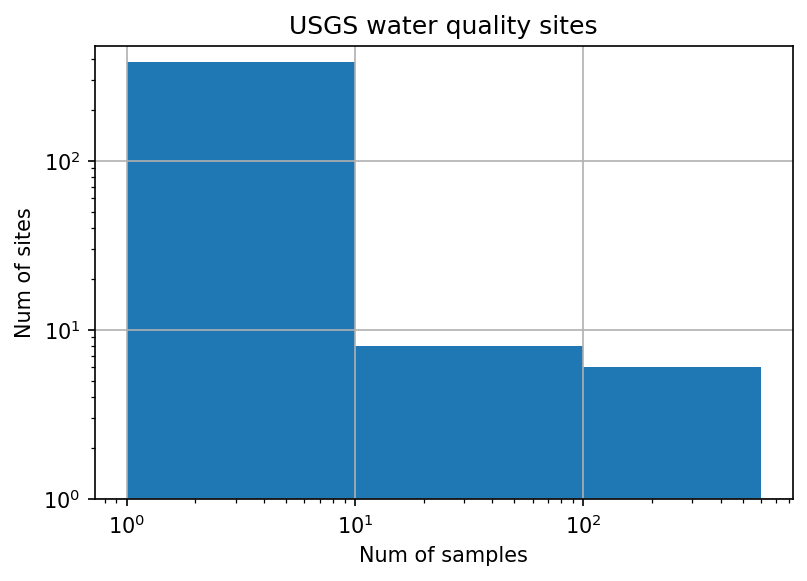

In [209]:
sub_df.hist(column='count_nu', bins = [1,10,100,600])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Num of samples')
plt.ylabel('Num of sites')
plt.ylim([0.99, None])
plt.title('USGS water quality sites')